# Step2 演習01 線形分離不可能なデータ
---

ディープラーニングコースはじめての演習へようこそ！！

これから実践的なディープラーニングの実装が始まります。

難しいと感じる課題もあると思いますが、一つ一つの課題が重要な意味を持ちますので、しっかりと取り組んでください。

本演習では、線形分離不可能なデータに対してニューラルネットワークモデルの構築・学習に取り組みます。

まずはじめに基本論理回路のAND, OR, NOT回路を単純パーセプトロンで実装し、講義で扱った内容を実際に試してみます。

また基本論理回路を組み合わせた、XOR回路の組み立てを行います。

次に入力層・隠れ層・出力層の２層のニューラルネットワークのモデルを構築し、線形分離不可能なデータの学習・分類を行います。

**はじめに**
- for文やwhile文の利用は明示的な利用指示がない場所での利用は避けてください。
- データセットは訓練データのみを扱います。

**本演習の目的** 
- 基本論理回路を実装する。
- 基本論理回路を組み合わせて、XOR回路を組み立てることができることを確認する。
- 小さいデータ数と小さなニューラルネットワークの実装を通して、ネットワークの構築とモデルの学習プロセスを学ぶ。

## ライブラリのインポート

まずはじめに、利用するライブラリのインポートを行います。

- [NumPy](http://www.numpy.org) 数値計算を行うための基本パッケージの公式ドキュメント
- [Matplotlib](http://matplotlib.org) グラフ描画ライブラリの基本パッケージの公式ドキュメント

ドキュメントには有用な情報が書き記されています。何か迷ったときには必ずドキュメントに戻ってくるようにしましょう。

次のセルをそのまま実行（"SHIFT" + "ENTER"）してください。コードが書いてあるセルは**上から順番**に順次実行してください。

**注意**： 初めてmatplotlibを使うユーザーは、フォント一覧のキャッシュが存在しないため、このセルの実行でWarningが出ます。もう一度実行すると、すでにキャッシュができているので、Warningなく走ります。

In [91]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
font = {'family':'IPAexGothic'}
plt.rc('font', **font)

## 単純パーセプトロン

まずはじめに、入力層と出力層のみのモデルを構築します。

入力のユニット数２、出力のユニット数が１のシンプルな単純パーセプトロンです。
<br>
<br>
**モデル**:
<div align="center"  style="width:35%">
<img src="./img/step2_simple_perceptron.png"></div>


### ステップ関数の実装

単純パーセプトロンの出力層で使う関数を準備します。ここでは、ステップ関数を実装します。

$$
  f(x) = \left\{ \begin{array}{ll}
    1　(x>0) \\
    0　(x≦0)
  \end{array} \right.
$$

**【課題１】** ステップ関数 step(x) を実装してください。戻り値はステップ関数の出力とします。

In [92]:
#Coursedele-02 Step2 QuestionNumber1 e2be1fd31dd34879f8a5cd735eda28de
def step(x):
    ###############START CODE HERE###############
    x[x > 0] = 1
    x[x <= 0] = 0
    return x
    ################END CODE HERE################

** ファイルを保存後 **、次のセルを実行（Shift+Enter）で採点を行います。

In [93]:
%%bash
./validation_client.py dele-02 2 1 Step2_01.ipynb api.internal.zero2one.jp

Congraturation!
We give you 10 points out of 10 points.



In [94]:
step(np.array([-10, -5, 0, 5, 10,15]))

array([0, 0, 0, 1, 1, 1])

**Expected Output**: 
<table style = "width:50%">
    <tr>
    <td>** step(np.array([-10, -5, 0, 5, 10,15]))**</td> 
        <td>([0, 0, 0, 1, 1, 1])</td> 
    </tr>

</table>

単純パーセプトロンのモデルの確認と出力層で使うステップ関数の実装をしました。

次に入力データを確認し、基本論理回路AND, OR, NOT回路を順番に実装していきます。

### 入力データ

基本論理回路への入力 $x$ は次のセルに示します。

下のセルをそのまま実行してください。

In [95]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

In [96]:
print(X)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]


In [97]:
X.shape

(4, 2)

## AND回路

AND回路は、入力がどちらも１であれば１を返す論理回路です。

図に示すと次のようになります。
<br>
<br>
<div align="center"  style="width:35%">
<img src="./img/step2_and_graph.png"></div>

ANDは、入力$x$=(0, 0)(0, 1)(1, 0)(1, 1)のときの出力y=(0, 0, 0, 1)となります。

下の表には入力と目標となる出力をまとめています。


<table style="width:30%">

	<thead>
	<tr>
		<th >入力$X_1$</th>
		<th >入力$X_2$</th>
		<th >出力$y$</th>
	</tr>
	</thead>

  <tr>
    <td>0</td>
    <td> 0 </td> 
    <td> 0 </td> 
  </tr>
  
    <tr>
    <td>0</td>
    <td> 1 </td> 
    <td> 0 </td> 
  </tr>
  
    <tr>
    <td>1</td>
    <td> 0 </td> 
    <td> 0 </td> 
  </tr>
 
     <tr>
    <td>1</td>
    <td> 1 </td> 
    <td> 1 </td> 
  </tr>
  
</table>

**【課題２】** 関数AND(x)を実装してください。重みwの値は授業でも扱った３にします。戻り値はANDの出力とします。
<br>
<br>
$$f(x)=wx+b$$

** Note **
- xは入力データです。
- wは重みです。np.array([None,None])で記述します。
- bはバイアスです。-5にします。
- fにはnp.dot()でwとxの演算を行い、バイアスbを足し合わせます。
- 最後に先ほど実装したステップ関数を利用して、fの値を入れ出力します。

In [98]:
#Coursedele-02 Step2 QuestionNumber2 ea5f99af770ac69b11b59f5c9dcffe01
def AND(x):
    ###############START CODE HERE###############
    w = np.array([3,3])
    b = -5
    f = np.dot(w,x.T) + b
    y = step(f)
    ################END CODE HERE################
    return y

In [99]:
# w = np.array([[3,3]])
# b = -5
# f = np.dot(X,w.T) + b
# y = step(f)

In [100]:
AND(X)

array([0, 0, 0, 1])

In [101]:
# w

In [102]:
# w.shape

** ファイルを保存後 **、次のセルを実行（Shift+Enter）で採点を行います。

In [103]:
%%bash
./validation_client.py dele-02 2 2 Step2_01.ipynb api.internal.zero2one.jp

ExcessiveAccess: Wait for 10 minutes
Error regarding to send score



In [104]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
AND(X)

array([0, 0, 0, 1])

**Expected Output**: 
<table style = "width:40%">
    <tr>
    <td>** AND(X) **</td> 
        <td>([0, 0, 0, 1])</td> 
    </tr>

</table>

## OR回路

OR回路は、入力のいずれかに１があれば１を返す論理回路です。図に示すとこのようになります。
<br>
<br>
<div align="center"  style="width:35%">
<img src="./img/step2_or_graph.png"></div>

ORは、入力 $x$ = (0, 0)(0, 1)(1, 0)(1, 1) のときの出力 y = (0, 1, 1, 1) となります。

下の表には入力と目標となる出力をまとめています。

<table style="width:30%">

	<thead>
	<tr>
		<th >入力$X_1$</th>
		<th >入力$X_2$</th>
		<th >出力$y$</th>
	</tr>
	</thead>

  <tr>
    <td>0</td>
    <td> 0 </td> 
    <td> 0 </td> 
  </tr>
  
    <tr>
    <td>0</td>
    <td> 1 </td> 
    <td> 1 </td> 
  </tr>
  
    <tr>
    <td>1</td>
    <td> 0 </td> 
    <td> 1 </td> 
  </tr>
 
     <tr>
    <td>1</td>
    <td> 1 </td> 
    <td> 1 </td> 
  </tr>
  
</table>

**【課題３】** 関数OR(x)を実装してください。重みwの値は授業でも扱った3にします。戻り値はORの出力とします。
<br>
<br>
$$f(x)=wx+b$$

- xは入力データです。
- wは重みです。np.array([None,None])で記述します。
- bはバイアスです。-2にします。
- fにはnp.dot()でwとxの演算を行い、バイアスbを足し合わせます。
- 最後に先ほど実装したステップ関数を利用して、fの値を入れ出力します。

In [105]:
#Coursedele-02 Step2 QuestionNumber3 c639447dfdef89b30869263df438182b
def OR(x):
    ###############START CODE HERE###############
    w = np.array([3,3])
    b = -2
    f = np.dot(w,x.T) + b
    y = step(f)
    ################END CODE HERE################
    return y

** ファイルを保存後 **、次のセルを実行（Shift+Enter）で採点を行います。

In [106]:
%%bash
./validation_client.py dele-02 2 3 Step2_01.ipynb api.internal.zero2one.jp

Congraturation!
We give you 10 points out of 10 points.



In [107]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
OR(X)

array([0, 1, 1, 1])

**Expected Output**: 
<table style = "width:40%">
    <tr>
    <td>** OR(X) **</td> 
        <td>([0, 1, 1, 1])</td> 
    </tr>

</table>

## NOT回路

最後に、NOT回路を実装します。

NOT回路は、入力の逆の出力を返す論理回路です。図に示すとこのようになります。
<br>
<br>
<div align="center"  style="width:35%">
<img src="./img/step2_not_graph.png"></div>

NOTは、入力$x$=(0), (1)のときの出力y=(1,0)となります。

下の表には入力と目標となる出力をまとめています。

<table style="width:30%">

	<thead>
	<tr>
		<th >入力$X_1$</th>
		<th >出力$y$</th>
	</tr>
	</thead>

  <tr>
    <td>0</td>
    <td> 1 </td> 
  </tr>
  
    <tr>
    <td> 1 </td> 
    <td> 0 </td> 
  </tr>
  
</table>

**【課題４】** 関数NOT(x)を実装してください。重みwの値は授業でも扱った-3にします。戻り値はNOTの出力とします。
<br>
<br>
$$f(x)=wx+b$$

- xは入力データです。
- wは重みです。 -3です。
- bはバイアスです。1にします。
- fにはnp.dot()でwとxの演算を行い、バイアスbを足し合わせましょう。
- 最後に先ほど実装したステップ関数を利用して、fの値を入れ出力しましょう。

In [108]:
#Coursedele-02 Step2 QuestionNumber4 78047679d404a8cf7ffe97ce91095591
def NOT(x):
    ###############START CODE HERE###############
    w = np.array([[-3]])
    b = 1
    f = np.dot(x,w) + 1
    y = step(f)
    ################END CODE HERE################
    return y

** ファイルを保存後 **、次のセルを実行（Shift+Enter）で採点を行います。

In [109]:
%%bash
./validation_client.py dele-02 2 4 Step2_01.ipynb api.internal.zero2one.jp

ExcessiveAccess: Wait for 10 minutes



In [110]:
X = np.array([[0], [1]])
NOT(X)

array([[1],
       [0]])

**Expected Output**: 
<table style = "width:40%">
    <tr>
    <td>** NOT **</td> 
        <td>([[1], [0]])</td> 
    </tr>

</table>

以上が、単純パーセプトロンを用いたAND, OR, NOTの基本論理回路の実装でした。

## 単純パーセプトロンの限界

単純パーセプトロンでは線形分離不可能なデータの分類・学習を行うことができませんでした。

ここで新たに、基本論理回路を組み合わせたXOR（排他的論理和）を実装します。

XORは、入力 $x$=(0, 0)(0, 1)(1, 0)(1, 1) のときの出力 y=(0, 1, 1, 0) となります。

下のグラフには入力と目標となる出力をまとめてあります。

<table style="width:30%">

	<thead>
	<tr>
		<th >入力$X_1$</th>
		<th >入力$X_2$</th>
		<th >出力$y$</th>
	</tr>
	</thead>

  <tr>
    <td>0</td>
    <td> 0 </td> 
    <td> 0 </td> 
  </tr>
  
    <tr>
    <td>0</td>
    <td> 1 </td> 
    <td> 1 </td> 
  </tr>
  
    <tr>
    <td>1</td>
    <td> 0 </td> 
    <td> 1 </td> 
  </tr>
 
     <tr>
    <td>1</td>
    <td> 1 </td> 
    <td> 0 </td> 
  </tr>
  
</table>

具体的にこれらの入力と出力を図で示すとこのようになります。
<br>
<br>
<div align="center"  style="width:35%">
<img src="./img/step2_xor_graph.png"></div>
<br>
<br>
XORは、グラフをみるとわかるとおり、直線（ここでは２クラスのため直線１本）で分類することができません。

つまり、単純パーセプトロンでは解くことができない、線形分離できないデータです。

## 隠れ層１層を増やしてみる

では、実際にどのように解決するかというと、「隠れ層１層」 追加することでこの問題を解決することができました。

論理回路を組み合わせてみると次の図のようになります。
<br>
<br>
<div align="center"  style="width:55%">
<img src="./img/step2_xor_circuit.png"></div>


**【課題５】** 関数XOR(x)を実装してください。戻り値はXORの出力とします。

では、実際にXORのモデルを実装してみましょう。これまで実装してきたAND(x), OR(x), NOT(x)回路の関数を使って実装します。

In [111]:
#Coursedele-02 Step2 QuestionNumber5 c75c4f1599b27b27d35326aadeb158ff
def XOR(x):
    ###############START CODE HERE###############
    #隠れ層のAND
    y1 = AND(x)
    #隠れ層のNOT
    y2 = NOT(y1.reshape(4,1))
    #隠れ層のOR
    y3 = OR(x).T
    #出力層への入力データはy2とy3を結合する必要があります。np.c_を使うことができます。
    y4 = np.c_[y2,y3] 
    #出力層:and
    y5 = AND(y4)
    ################END CODE HERE################
    return y5

** ファイルを保存後 **、次のセルを実行（Shift+Enter）で採点を行います。

In [112]:
%%bash
./validation_client.py dele-02 2 5 Step2_01.ipynb api.internal.zero2one.jp

ExcessiveAccess: Wait for 10 minutes



In [113]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
XOR(X)

array([0, 1, 1, 0])

**Expected Output**: 
<table style = "width:40%">
    <tr>
    <td>** XOR **</td> 
        <td>([0, 1, 1, 0])</td> 
    </tr>

</table>

** おつかれさまでした。 **

無事XORの出力である (0, 1, 1, 0) を得ることができました。

ニューラルネットワークを実装する一歩手前である論理回路を組み合わせて、非線形分類の実装を行いました。

---

# XORをニューラルネットワークのモデルで実装

これまで論理回路を組み合わせて人為的に決めた重み $w$ とバイアス $b$ を使って実装を行ってきましたが、

「XORをニューラルネットワークのモデルで実装」では、実際にニューラルネットワークのモデルを組み、学習を通して重み $w$ とバイアス $b$ の値を求めます。

本格的なニューラルネットワークの実装を行います。

## ニューラルネットワークのモデルを定義

ニューラルネットワークのモデルは次の通りにします。

- 入力層のユニット数 ２個
- 隠れ層のユニット数 ４個
- 出力層のユニット数 １個

出力が１個の二項分類問題です。

<div align="center"  style="width:100%">
<img src="./img/step2_xor_binary_01.png"></div>

<table style="width:30%">

	<thead>
	<tr>
		<th >入力$X_1$</th>
		<th >入力$X_2$</th>
		<th >出力$y$</th>
	</tr>
	</thead>

  <tr>
    <td>0</td>
    <td> 0 </td> 
    <td> 0</td> 
  </tr>
  
    <tr>
    <td>0</td>
    <td> 1 </td> 
    <td> 1 </td> 
  </tr>
  
    <tr>
    <td>1</td>
    <td> 0 </td> 
    <td> 1 </td> 
  </tr>
 
     <tr>
    <td>1</td>
    <td> 1 </td> 
    <td> 0 </td> 
  </tr>
  
</table>

ここでは下記の条件で、ニューラルネットワークのモデルを構築します：

- 入力層のニューロン数 2個
- 隠れ層のニューロン数 4個
- 出力層のニューロン数 1個

In [114]:
#ニューラルネットワークのモデル
input_size = 2
hidden_size = 4
output_size = 1

In [115]:
print("入力層のユニット数：{}".format(input_size))
print("隠れ層のユニット数：{}".format(hidden_size))
print("出力層のユニット数：{}".format(output_size))

入力層のユニット数：2
隠れ層のユニット数：4
出力層のユニット数：1


## データセットの準備

まずはじめにXORの入力データ $X$ と出力 $y$ の配列データを用意します。

入力 $X=(0, 0)(0, 1)(1, 0)(1, 1)$ のshapeは（4, 2）、正解ラベル $y = (0)(1)(1)(0)$ のshapeは(4, 1)です。

In [116]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([ [0], [1], [1], [0]])

In [117]:
print(X)
print(y)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[[0]
 [1]
 [1]
 [0]]


**Expected Output** .

<table style="width:40%">
  <tr>
    <td>X</td>
    <td>[[0 0]
 [0 1]
 [1 0]
 [1 1]]</td> 
  </tr>
  
    <tr>
    <td>y</td>
    <td>[[0]
 [1]
 [1]
 [0]]</td> 
  </tr>

</table>

In [118]:
print ('入力データ X の shape:' + str(X.shape))
print ('正解ラベル y の shape:' + str(y.shape))

入力データ X の shape:(4, 2)
正解ラベル y の shape:(4, 1)


**Expected Output** .

<table style="width:40%">
  <tr>
    <td>入力データ X </td>
    <td>(4, 2)</td> 
</tr>
  
    <tr>
    <td>正解ラベル y</td>
    <td>(4, 1)</td> 
</tr>
  
</table>

$m$ に訓練データの数を格納しておきます。今回は4個のデータセットになります。

In [119]:
m = X.shape[0] #訓練データ数をmに格納

## 活性化関数

活性化関数を準備します。今回は、シグモイド関数を利用します。

**【課題６】** シグモイド関数 sigmoid(x) を実装してください。戻り値はシグモイド関数の出力とします。

シグモイド関数：

$$\sigma{(x)}=\frac{1}{1+e^{-x}}$$

In [120]:
#Coursedele-02 Step2 QuestionNumber6 3f932296803922d60068e619f3055e9c
def sigmoid(x):
    ###############START CODE HERE###############
    y =1/(1 + np.exp(-x))
    ################END CODE HERE################
    return y

** ファイルを保存後 **、次のセルを実行（Shift+Enter）で採点を行います。

In [121]:
%%bash
./validation_client.py dele-02 2 6 Step2_01.ipynb api.internal.zero2one.jp

ExcessiveAccess: Wait for 10 minutes



In [122]:
sigmoid(0)

0.5

**Expected Output**: 
<table style = "width:40%">
    <tr>
    <td>** sigmoid(0) **</td> 
        <td>0.5</td> 
    </tr>

</table>

** 【課題７】 **シグモイド関数の微分 sigmoid_derivative(x) を実装してください。戻り値はシグモイド関数の微分の出力とします。

シグモイド関数の微分：

$$\sigma'{(x)}=\sigma{(x)}(1-\sigma{(x)})$$

In [123]:
#Coursedele-02 Step2 QuestionNumber7 7bbb13280bb8d9466f82808ef5bd3288
def sigmoid_derivative(x):
    ###############START CODE HERE###############
    y = sigmoid(x)*(1 - sigmoid(x))
    ################END CODE HERE################
    return y

** ファイルを保存後 **、次のセルを実行（Shift+Enter）で採点を行います。

In [124]:
%%bash
./validation_client.py dele-02 2 7 Step2_01.ipynb api.internal.zero2one.jp

ExcessiveAccess: Wait for 10 minutes



In [125]:
sigmoid_derivative(0)

0.25

**Expected Output**: 
<table style = "width:40%">
    <tr>
    <td>** sigmoid_derivative(0) **</td> 
        <td>0.25 </td> 
    </tr>

</table>

## パラメータの初期化

重み$w$とバイアス$b$をランダムに初期化します。

パラメータの初期化には、一様分布を出力するNumPyの **np.random.uniform** を今回は使用します。

**【課題８】** ランダムにパラメータを初期化する initialize_parameters(input_size, hidden_size, output_size) を実装してください。

戻り値は重み$w_1,w_2$ バイアス$b_1,b_2$とします。

**Note**
- 重みwの初期化の方法
 - np.random.uniform(low=-1, high=1, size=(a, b))
 - NumPyのrandom.uniformを使います。lowとhighは出力する乱数の上限下限を決めます。aとbには数値を与え行列のshapeを決定します。
- バイアスbの初期化の方法
 - np.zeros((a, b))
 - NumPyのnp.zerosを使います。aとbには数値を与え行列のshapeを決定します。

本課題では、行列のshapeを "input_size, hidden_size, output_size" を使って決定します。

In [126]:
#Coursedele-02 Step2 QuestionNumber8 38ce71c74b3fba99df548fd080040711
def initialize_parameters(input_size, hidden_size, output_size):
    ###############START CODE HERE###############
    W1 = np.random.uniform(low=-1,high=1,size=(input_size,hidden_size))
    b1 = np.zeros((1,hidden_size))
    W2 = np.random.uniform(low=-1,high=1,size=(hidden_size,output_size))
    b2 = np.zeros((1,output_size))
    ################END CODE HERE################
    return W1, b1, W2, b2

** ファイルを保存後 **、次のセルを実行（Shift+Enter）で採点を行います。

In [127]:
%%bash
./validation_client.py dele-02 2 8 Step2_01.ipynb api.internal.zero2one.jp

ExcessiveAccess: Wait for 10 minutes



In [128]:
W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)

In [129]:
print("W1の初期値\n", W1)
print("b1の初期値\n", b1)
print("W2の初期値\n", W2)
print("b2の初期値\n", b2)

W1の初期値
 [[ 0.6475947  -0.85332798  0.55573023  0.69713096]
 [-0.76399483  0.14427787  0.09223539 -0.98959537]]
b1の初期値
 [[0. 0. 0. 0.]]
W2の初期値
 [[ 0.9142278 ]
 [ 0.20921491]
 [ 0.89081421]
 [-0.63463661]]
b2の初期値
 [[0.]]


In [130]:
print("W1のshape：" + str(W1.shape))
print("b1のshape：" + str(b1.shape))
print("W2のshape：" + str(W2.shape))
print("b2のshape：" + str(b2.shape))

W1のshape：(2, 4)
b1のshape：(1, 4)
W2のshape：(4, 1)
b2のshape：(1, 1)


<table style = "width:15%">
    <tr>
    <td>** W1 **</td> 
        <td>(2, 4) </td> 
    </tr>
        <tr>
    <td>** b1 **</td> 
        <td>(1, 4) </td> 
    </tr>
    <tr>
    <td>** W2 **</td> 
        <td>(4, 1) </td> 
    </tr>
        <tr>
    <td>** b2 **</td> 
        <td>(1, 1) </td> 
    </tr>

</table>

## フォワードプロパゲーション

学習手順1.順伝播、フォワードプロパゲーションの実装します。

下に講義で扱ったニューラルネットワークの学習ステップのイメージ図を載せてあります。 

<br>

<div style="width:50%"><img src="./img/nn_fp.png"></div>

**フォワード**:
$$z^{(1)}=W^{(1)}x^{(1)}+b^{(1)}$$
$$a^{(1)}=sigmoid(z^{(1)})$$
$$z^{(2)}=W^{(1)}a^{(1)}+b^{(2)}$$
$$a^{(2)}=sigmoid(z^{(2)})$$

**【課題９】** 順伝播を行う関数 forward_propagation(X, W1,b1,W2, b2) を実装してください。戻り値は、 $z^{(1)},a^{(1)},z^{(2)},a^{(2)}$ とします。

**Note:**
 - フォワードプロパゲーションの実装を行います。layer1_z, layer1_a, layer2_z, layer2_a にそれぞれ記述してください。
 - 上の数式とコードはそれぞれ対応関係にあります。$z^{(1)}$は、"layer1_z"と対応しています。$a^{(1)}$は、"layer1_a"です。以下同様です。
 - 活性化関数はシグモイド関数とします。
 

In [190]:
#Coursedele-02 Step2 QuestionNumber9 64e8ec516a7c0716114cf9bfa6272f98
def forward_propagation(X, W1, b1, W2, b2):
    ###############START CODE HERE###############
    layer1_z = np.dot(X,W1) + b1
    layer1_a = sigmoid(layer1_z)
    layer2_z = np.dot(layer1_a,W2) + b2
    layer2_a = sigmoid(layer2_z)
    ################END CODE HERE################
    return layer1_z, layer1_a, layer2_z, layer2_a

** ファイルを保存後 **、次のセルを実行（Shift+Enter）で採点を行います。

In [191]:
%%bash
./validation_client.py dele-02 2 9 Step2_01.ipynb api.internal.zero2one.jp

Congraturation!
We give you 10 points out of 10 points.



In [192]:
layer1_z, layer1_a, layer2_z, layer2_a = forward_propagation(X, W1, b1, W2, b2)

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: overflow encountered in exp


In [193]:
layer1_a.shape

(4, 4)

In [135]:
print("初期のパラメータのモデルの出力: ")
print(layer2_a)

初期のパラメータのモデルの出力: 
[[0.66592469]
 [0.66743703]
 [0.69106206]
 [0.69278298]]


モデルの学習を通してフォワードプロパゲーションの出力 layer2_a を正解ラベル $y$ になるべく近づけることが目標の一つとなります。

## コスト関数

手順2.コスト関数を実装します。

<br>
<div style="width:50%">
<img src="./img/nn_cost.png"></div>

**コスト関数**：
$$C(w,b)=-\frac{1}{m}\sum_{n=1}^{m}\{y_n{\log}\hat{y}_{n}+(1-y_{n}){\log}(1-\hat{y}_n)\}$$

**【課題１０】** 目的関数の値を計算する関数compute_cost(y, y_hat, m)を実装してください。戻り値は、コスト関数の出力とします。

**Note:**
 - クロスエントロピー関数をコスト関数とします。
 - フォワードプロパーゲションの出力は、layer2_a です。$\hat{y}$に対応します。
 - $y$ は正解ラベル
 - $\hat{y}$ はモデルの出力
 - $m$ は訓練データ数

In [136]:
#Coursedele-02 Step2 QuestionNumber10 8003a7289756706da9ad6b4b8a3783b4
def compute_cost(y, y_hat, m):
    ###############START CODE HERE###############
    cost = -(1/m)*np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))
    ################END CODE HERE################
    return cost

** ファイルを保存後 **、次のセルを実行（Shift+Enter）で採点を行います。

In [137]:
%%bash
./validation_client.py dele-02 2 10 Step2_01.ipynb api.internal.zero2one.jp

ExcessiveAccess: Wait for 10 minutes



In [138]:
cost = compute_cost(y, layer2_a, m)

In [139]:
print(y.shape)
print(layer2_a.shape)

(4, 1)
(4, 1)


In [140]:
print("初期のパラメータのモデルのコスト: ", cost)

初期のパラメータのモデルのコスト:  0.7626063991788805


コスト関数の出力をなるべく$０$ 極小値（最小値）に近づくようにモデルの学習を進めることが一つの目標になります。

## バックプロパゲーションの実装

手順3.逆伝播 では、目的関数のパラメータについての勾配を求めます。

ニューラルネットワークにおける一番重要な実装部分になります。

<br>

<div style="width:50%">
<img src="./img/nn_bp.png"></div>

**バックプロパゲーション**:
<br>
<br>
<div style="width:70%">
<img src="./img/step2_NN_fp_bp.png"></div>

※このイメージは、コスト関数にクロスエントロピー関数、出力層にシグモイド関数を用いた例です。

**【課題１１】** 逆伝播を行う関数 back_propagation(X, Y, W2, layer1_z, layer1_a, layer2_z, layer2_a) を実装してください。

戻り値は、目的関数のパラメータに関する勾配 $\Delta{w^{(1)}}, \Delta{b^{(1)}}, \Delta{w^{(2)}}, \Delta{b^{(2)}}$ とします。

**Note1:**
 - 上の数式を参考にバックプロパゲーションの実装を行います。
 - バックプロパゲーションはディープラーニングで一番大変な部分ですが、ここ乗り越えることは非常に重要な意味を持ちますので頑張りましょう。
 - 行列演算に注意し、np.dot()や転置行列を意味する".T"を使用することでうまく実装します。
 
**Note2 関数 back_propagation の引数:**
 
 * X：入力データ
 * y：正解ラベル
 * W2：隠れ層と出力層の間の重み
 * layer1_z：レイヤー1の線形結合$z_1$
 * layer1_a：レイヤー1の活性化後の値$a_1$
 * layer2_z：レイヤー2の線形結合$z_2$
 * layer2_a：レイヤー2の出力の値$a_2$
 * sigmoid_derivative()：シグモイド関数の微分

In [194]:
#Coursedele-02 Step2 QuestionNumber11 217e824174825940b69ecfed73e2284c
def back_propagation(X, y, W2, layer1_z, layer1_a, layer2_z, layer2_a):
    m = X.shape[0]
    ###############START CODE HERE###############
    derivative_layer2_z = (layer2_a - y) / m
    delta_W2 = np.dot(layer1_a.T,derivative_layer2_z)
    delta_b2 = np.sum(derivative_layer2_z,axis=0,keepdims=True)
    
    derivative_layer1_z = np.dot(derivative_layer2_z,W2.T) * sigmoid_derivative(layer1_z)
    delta_W1 = np.dot(X.T,derivative_layer1_z)
    delta_b1 = np.sum(derivative_layer1_z,axis=0,keepdims=True)
    ################END CODE HERE################
    return delta_W2, delta_b2, delta_W1, delta_b1

** ファイルを保存後 **、次のセルを実行（Shift+Enter）で採点を行います。

In [195]:
%%bash
./validation_client.py dele-02 2 11 Step2_01.ipynb api.internal.zero2one.jp

Congraturation!
We give you 10 points out of 10 points.



In [196]:
# derivative_layer2_z = (1/m)*(layer2_a - y)
# delta_W2 = (1/m)*(layer2_a - y)*layer1_a
# delta_b2 = (1/m)*(layer2_a - y)
# print(y.shape)
# print(layer2_a.shape)
print(layer1_a.shape)

print(derivative_layer2_z.shape)
print(delta_W2.shape)
print(delta_b2.shape)

(4, 4)
(4, 1)
(4, 1)
(1, 1)


In [197]:
# derivative_layer1_z = (1/m)*(layer2_a - y)*W2*layer1_a*(1-layer1_a)
# delta_W1 = (1/m)*np.dot(X.T,(layer2_a - y)*W2*layer1_a*(1-layer1_a))
# delta_b1 = (1/m)*(layer2_a - y)*W2*layer1_a*(1-layer1_a)
print(derivative_layer1_z.shape)
print(delta_W1.shape)
print(delta_b1.shape)

(4, 4)
(2, 4)
(1, 4)


In [198]:
delta_W2, delta_b2, delta_W1, delta_b1 = back_propagation(X, y, W2, layer1_z, layer1_a, layer2_z, layer2_a)
delta_W1

array([[2.69717792e-03, 1.34813989e-03, 3.35417377e-03, 2.39175703e-13],
       [2.39171680e-13, 1.34825390e-03, 3.35432235e-03, 2.69770296e-03]])

## パラメータの更新

最後に手順4.パラメータの更新です。

<div style="width:50%">
<img src="./img/nn_update.png"></div>

*パラメータの更新式：*
$$w=w-\alpha\Delta{w}$$
$$b=b-\alpha\Delta{b}$$

**【課題１２】** パラメータの更新を行う update_parameters(W1, b1, W2, b2, delta_W1, delta_b1, delta_W2, delta_b2, learning_rate) を実装してください。

戻り値は、パラメータ $W^{(1)}, b^{(1)}, W^{(2)}, b^{(2)}$ とします。

**Note:**
 - バックプロパゲーションで計算した勾配（delta_W1, delta_b1, delta_W2, delta_b2）を用いてパラメータの更新を行います。
 - $\alpha$は学習率（learning_rate）です。

In [199]:
#Coursedele-02 Step2 QuestionNumber12 9d931b999b2b25254831ca5825979156
def update_parameters(W1, b1, W2, b2, delta_W1, delta_b1, delta_W2, delta_b2, learning_rate):
    ###############START CODE HERE###############
    W1 = W1 - learning_rate * delta_W1
    b1 = b1 - learning_rate * delta_b1  
    W2 = W2 - learning_rate * delta_W2
    b2 = b2 - learning_rate * delta_b2
    ################END CODE HERE################
    return W1, b1, W2, b2

** ファイルを保存後 **、次のセルを実行（Shift+Enter）で採点を行います。

In [200]:
%%bash
./validation_client.py dele-02 2 12 Step2_01.ipynb api.internal.zero2one.jp

Congraturation!
We give you 10 points out of 10 points.



In [201]:
W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, delta_W1, delta_b1, delta_W2, delta_b2, learning_rate = 0.1)

## ニューラルネットワークを構築

最後にニューラルネットワークのモデルを構築します。

これまで学習してきたコードを参考に、それぞれ"None"となっている部分に書き込みましょう。

これまでのすべての演習に合格していれば、今回構築したネットワークをうまく学習が進み、XORの出力を学習を通して求めることができます。

**【課題１３】** ニューラルネットワークのモデル XOR_model(W1,b1,W2,b2) を構築してください。

関数XOR_modelの引数は、$W^{(1)}, b^{(1)}, W^{(2)}, b^{(2)}$ とします。

戻り値は、順伝播の出力 layer2_a と $パラメータ W^{(1)}, b^{(1)}, W^{(2)}, b^{(2)}$  とします。

In [208]:
#Coursedele-02 Step2 QuestionNumber13 e861026c1c2d535dd8d480833520f3eb
def XOR_model(W1, b1, W2, b2):
    # データセットの準備
    # XOR
    X = np.array([[0,0], [0,1], [1,0], [1,1]])
    y = np.array([[0], [1], [1], [0]])
    m = X.shape[0]

    # 学習率
    learning_rate = 0.2  # 固定
    # エポック 
    epochs =  30000   # 固定
    
    ###############START CODE HERE###############
    for _ in range(epochs):

        # フォワードプロパゲーション
        # Layer1

        layer1_z = np.dot(X,W1) + b1
        layer1_a = sigmoid(layer1_z)

        #Layer2
        layer2_z = np.dot(layer1_a,W2) + b2
        layer2_a = sigmoid(layer2_z)
        
        # コスト関数
        cost.append(- np.sum(y * np.log(layer2_a) + (1-y) * np.log(1 - layer2_a)) / m )
        
        # バックプロパゲーション
        derivative_layer2_z = (layer2_a - y) / m
        delta_W2 = np.dot(layer1_a.T,derivative_layer2_z)
        delta_b2 = np.sum(derivative_layer2_z,axis=0,keepdims=True)

        derivative_layer1_z = np.dot(derivative_layer2_z,W2.T) * sigmoid_derivative(layer1_z)
        delta_W1 = np.dot(X.T,derivative_layer1_z)
        delta_b1 = np.sum(derivative_layer1_z,axis=0,keepdims=True)
        # パラメータの更新
        W1 = W1 - learning_rate * delta_W1
        b1 = b1 - learning_rate * delta_b1  
        W2 = W2 - learning_rate * delta_W2
        b2 = b2 - learning_rate * delta_b2
    ################END CODE HERE################
    return layer2_a, W1, b1, W2, b2

下のセルを実行すると関数XOR_model(W1, b1, W2, b2)に学習前のパラメータを渡し、学習が始まります。

※学習が終わるまでに数秒かかります。

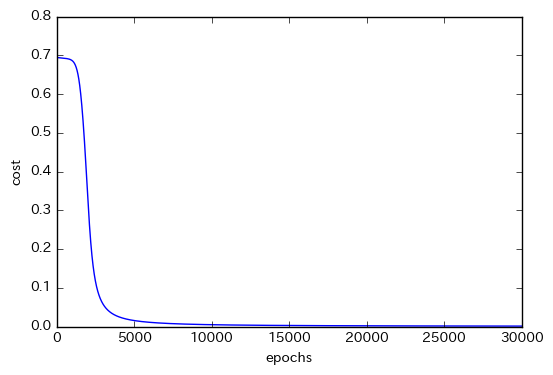

In [209]:
W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size) #パラメータを初期化
cost = [] #目的関数の出力の値を保持する配列
layer2_a, W1, b1, W2, b2 = XOR_model(W1, b1, W2, b2)
plt.plot(cost) #コスト関数の出力結果をプロット
plt.ylabel("cost")
plt.xlabel("epochs")
plt.show()

コスト関数の出力がうまく下がりきっていなければもう一度学習をおこなってください

**学習後のパラメータを採点のために保存**します。下のセルをそのまま実行してください。

課題の正誤判定は学習後のパラメータを使って、出力が正解ラベルの値に近づいているかで判定します。

In [210]:
#パラメータを保存
import h5py
with h5py.File('./learned_parameter/xor_parameter_learned.h5', 'w') as f:
    f.create_dataset('W1', data=W1)
    f.create_dataset('b1', data=b1)
    f.create_dataset('W2', data=W2)
    f.create_dataset('b2', data=b2)

** ファイルを保存後 **、次のセルを実行（Shift+Enter）で採点を行います。

In [211]:
%%bash
./validation_client.py dele-02 2 13 Step2_01.ipynb api.internal.zero2one.jp

Congraturation!
We give you 10 points out of 10 points.



In [212]:
print("XORモデルの学習後の出力")
print(layer2_a)

XORモデルの学習後の出力
[[4.99773539e-04]
 [9.98884640e-01]
 [9.98999775e-01]
 [1.55453496e-03]]


In [213]:
#出力結果が見づらい場合があるので0.5を基準に0, 1に分けてみる。
output = np.where(layer2_a > 0.5, 1, 0)
print(output)

[[0]
 [1]
 [1]
 [0]]


# 多クラス問題として解いてみる

これまで取り組んだニューラルネットワークでは出力が１つの二項分類問題としてモデルを構築し、その結果が「0に近いか1に近いか」という確率の問題として解きました。

同じ問題を出力を２つ（値を２つ）用意することで、多クラス問題として解くことができます。

たとえば、正解が1の場合は[1, 0] という２つの数値を出力し、正解が0の場合は [0, 1]という２つの数値を出力するように学習すれば、先ほどの１つの出力だけで解いていた問題を解くことができるわけです。

この考え方は２項分類問題を解くだけでなく、多クラス問題（複数のクラスを分類する問題）を解くときにも利用できます。

一方、 出力を複数用意してしまうと、そのままでは出力を確率として考えることができません。

シグモイド関数を使って出力を確率として扱えるようになったのと同様、少し工夫することで出力を確率とみなすことができるようになります。

具体的にはsoftmax関数を利用します。softmaxは数式から分かるように簡単に計算できます。

各出力値をexpの肩に乗せた値をすべて合計し、それを分母にします。

特定の出力をexpの肩に乗せた値を分子にして分母で割ったものは、その出力が全体のどの程度の割合になっているのかということを表現しているので、これは確率として解釈できます。

ニューラルネットワークの最終段でsoftmax関数を使うことにより、各出力を確率解釈できる値が入手できるわけです。

** 【課題１４】 ** softmax関数の出力を返す関数 softmax(x) を実装してください。

**Note:**
softmax関数の定義です。

$${\rm softmax}(x)_{i}=\frac{e^{x_i}}{\displaystyle\sum_{j=1}^{n}e^{x_j}}　(i=1,2,\ldots,n)$$

In [214]:
#Coursedele-02 Step2 QuestionNumber14 2b73d59ced6046b0535fcb3cb1aaac57
def softmax(x):
    ###############START CODE HERE###############
    exp_x = np.exp(x)
    y = exp_x / np.sum(exp_x,axis=1,keepdims=True)
    ################END CODE HERE################
    return y

** ファイルを保存後 **、次のセルを実行（Shift+Enter）で採点を行います。

In [217]:
%%bash
./validation_client.py dele-02 2 14 Step2_01.ipynb api.internal.zero2one.jp

Congraturation!
We give you 10 points out of 10 points.



下のセルを実行し、ソフトマックス関数の出力の総和は「１」となることを確認しましょう。

In [218]:
a = np.array([[6, 2, 3], [1, 2, 3]]) #サンプルデータ
print('softmax:\n', softmax(a))
print('softmaxの出力をすべて合計:\n', np.sum(softmax(a)))
print('softmaxの出力を行方向ごとに合計 (axis=1):\n', np.sum(softmax(a), axis=1))

softmax:
 [[0.93623955 0.01714783 0.04661262]
 [0.09003057 0.24472847 0.66524096]]
softmaxの出力をすべて合計:
 2.0
softmaxの出力を行方向ごとに合計 (axis=1):
 [1. 1.]


**Expected Output**: <br>
softmax:<br>
 [[0.93623955 0.01714783 0.04661262]<br>
 [0.09003057 0.24472847 0.66524096]]<br>
softmaxの出力をすべて合計:<br>
 2.0<br>
softmaxの出力を行方向ごとに合計 (axis=1):<br>
 [1. 1.]

**ソフトマックス関数 別解（テクニック）**

指数関数は入力値が増えると、出力の増加率も大きいので、値によっては桁数が足りずにオーバーフローしてしまいます。

そこで、 最大値を取得した上で、それを引くことでオーバーフローを回避することができます。

In [219]:
def softmax(x):
    c = np.max(x)
    exp_x = np.exp(x - c)
    y = exp_x / np.sum(exp_x, axis=1, keepdims=True)
    return y

### 多クラスのニューラルネットワークのモデルを構築

では、多クラスのニューラルネットワークのモデルを構築します。

ニューラルネットワークのモデルは次の通りにします。

- 入力層のユニット数 ２個
- 隠れ層のユニット数 ４個
- 出力層のユニット数 ２個

出力が２個の多クラス（マルチクラス）分類問題です。

<div align="center"  style="width:100%">
<img src="./img/step2_xor_mulch_01.png"></div>

<table style="width:30%">

	<thead>
	<tr>
		<th >入力$X_1$</th>
		<th >入力$X_2$</th>
		<th >出力$y_1$</th>
		<th >出力$y_2$</th>
	</tr>
	</thead>

  <tr>
    <td>0</td>
    <td> 0 </td> 
    <td> 0</td> 
    <td> 1</td> 
  </tr>
  
    <tr>
    <td>0</td>
    <td> 1 </td> 
    <td> 1 </td>
    <td> 0</td> 
  </tr>
  
    <tr>
    <td>1</td>
    <td> 0 </td> 
    <td> 1 </td>
    <td> 0</td> 
  </tr>
 
     <tr>
    <td>1</td>
    <td> 1 </td> 
    <td> 0 </td> 
    <td> 1</td> 
    </tr>
  
</table>

### ニューラルネットワークを構築

下のセルには、 **課題１３**で実装したコードをそのまま記載しています。

変わった点はニューラルネットワークの出力層にソフトマックス関数を使っている点です。

In [220]:
def XOR_model_mulch(W1, b1, W2, b2):
    # データセットの準備
    X = np.array([[0,0], [0,1], [1,0], [1,1]])
    y = np.array([[0, 1], [1, 0], [1, 0], [0, 1]])
    m = X.shape[0]

    # 学習率
    learning_rate = 0.2  #固定
    # エポック 
    epochs =  30000   #固定
    
    for _ in range(epochs):

        # フォワードプロパゲーション
        # Layer1
        layer1_z = np.dot(X, W1) + b1
        layer1_a = sigmoid(layer1_z)

        #Layer2
        layer2_z = np.dot(layer1_a, W2) + b2
        layer2_a = softmax(layer2_z)
        
        # コスト関数
        cost.append(- np.sum(y * np.log(layer2_a) / m ))
        
        # バックプロパゲーション
        derivative_layer2_z = (layer2_a - y) / m
        delta_W2 = np.dot(layer1_a.T, derivative_layer2_z) 
        delta_b2 = np.sum(derivative_layer2_z, axis=0 ,keepdims=True)
    
        derivative_layer1_z = np.dot(derivative_layer2_z, W2.T) * sigmoid_derivative(layer1_z)
        delta_W1 = np.dot(X.T, derivative_layer1_z) 
        delta_b1 = np.sum(derivative_layer1_z, axis=0 ,keepdims=True)
    
        # パラメータの更新
        W2 = W2 - learning_rate * delta_W2
        b2 = b2 - learning_rate * delta_b2
        W1 = W1 - learning_rate * delta_W1
        b1 = b1 - learning_rate * delta_b1
        
    return layer2_a, W1, b1, W2, b2

下のセルを実行すると関数XOR_model_mulch(W1, b1, W2, b2)に学習前のパラメータを渡し、学習が始まります。

※学習が終わるまでに数秒かかります。

In [221]:
#ニューラルネットワークのモデル
input_size = 2
hidden_size = 4
output_size_ = 2
W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size_) #パラメータを初期化
cost = []
layer2_a,W1,b1,W2,b2 = XOR_model_mulch(W1,b1,W2,b2)
print("XORモデルの学習後の出力")
print(layer2_a)

XORモデルの学習後の出力
[[9.26692025e-04 9.99073308e-01]
 [9.99284708e-01 7.15292429e-04]
 [9.99227646e-01 7.72353723e-04]
 [7.71259056e-04 9.99228741e-01]]


**コスト関数の出力**

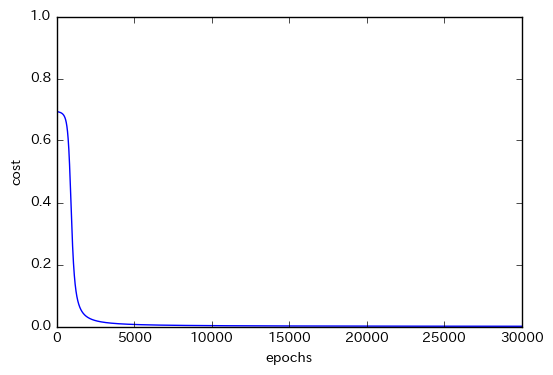

In [222]:
plt.plot(cost)
plt.ylabel("cost")
plt.xlabel("epochs")
plt.show()

**学習結果を可視化**

/opt/conda/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/opt/conda/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


(-1.0, 1.9800000000000026)

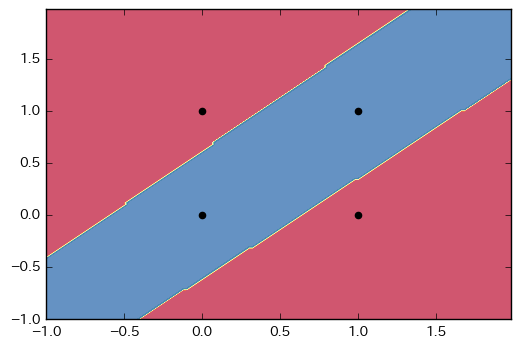

In [223]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W1) + b1), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c = "black")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

うまく分類ができていなければ、もう一度学習をおこなってください。

## おつかれさまでした。

以上で最初の演習『線形分離不可能なデータ』の学習・構築はおしまいです。

コスト関数の出力値が見事に学習を通して最適化され、出力がゼロに近づいていることが表を見てわかったと思います。

最後に本演習で行なったことを簡単に振り返ります。

* 単純パーセプトロンによる基本論理回路の実装
* シグモイド関数、ソフトマックス関数の実装
* フォワードプロパゲーション、バックプロパゲーションの実装
* ニューラルネットワークモデルの構築、学習
* 最適化
* 二項分類問題と多クラス分類

主に上記のことについて学習を行いました。

ライブラリを使わずにゼロからニューラルネットワークを実装したことは自信をもってください。

今回学習した内容は **ニューラルネットワークの基礎**となります。

しっかりと復習を行い、次の演習・ステップに活かしてください。

おつかれさまでした。